# Pokemon data visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We'll be using data gather by the user armgilles on his github:

https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6

In [3]:
df = pd.read_csv("Pokemon.csv")

The Pokemon data set contains 13 columns and 800 rows. The stats are corresponding to the Pokemon games.

In [4]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In this notebook we'll use it as a showcase for Matplotlib and Pandas capabilities, before proceeding to ML predictions.

We'll start with simple query tasks. For example, the Pokemon with number 719 contains "Mega" in its name. We may wonder, how many entries like that are there in our DataFrame. String method 'contains' will do just fine.

In [4]:
len(df[df["Name"].str.contains("Mega")])

49

Let's find the maximal value of Health Points that a Pokemon can have and corresponding statistics.

In [5]:
df.sort_values("HP",ascending=False)
max(df["HP"])

255

In [6]:
df.HP.describe()

count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: HP, dtype: float64

Let's histogram the HP distribution among all 6 generations.

Text(0.5, 1.0, 'Health points distribution')

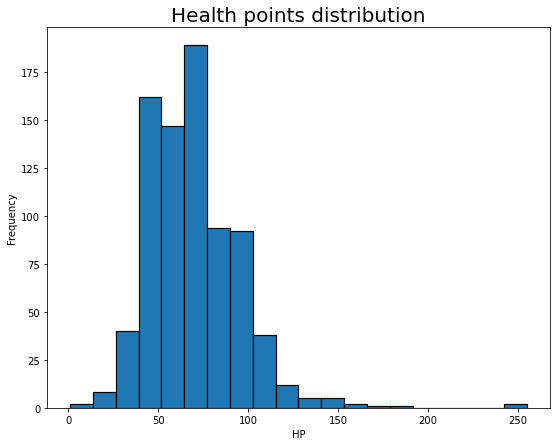

In [8]:
plt.figure(figsize=(9,7))
df.HP.plot(kind="hist", edgecolor='black', linewidth=1.2,bins=20)
plt.rc("axes",titlesize=20)
plt.rc("axes",labelsize=14)
plt.rc("xtick",labelsize=14)
plt.rc("ytick",labelsize=14)
plt.xlabel("HP")
plt.title("Health points distribution")

Text(0.5, 1.0, 'Health points distribution')

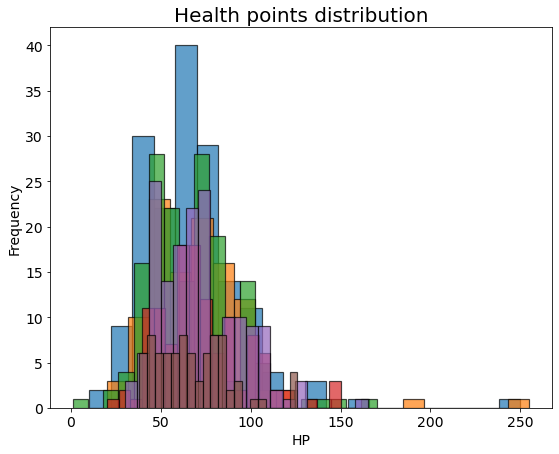

In [9]:
plt.figure(figsize=(9,7))
for i in range(1,7):
  df[df["Generation"]==i].HP.plot(kind="hist", edgecolor='black', linewidth=1.2,bins=20,alpha=0.7)
plt.rc("axes",titlesize=20)
plt.rc("axes",labelsize=14)
plt.rc("xtick",labelsize=14)
plt.rc("ytick",labelsize=14)
plt.xlabel("HP")
plt.title("Health points distribution")

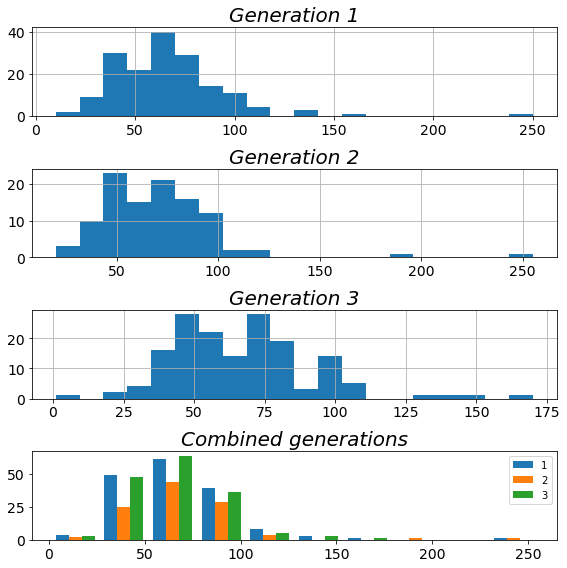

In [10]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots(4, 1, figsize=(8,8))
#fig, (n) = plt.subplots(4, 1)
for i in range(3):
  ax[i].hist(df[df["Generation"]==i+1].HP,bins=20)
  ax[i].set_title("Generation "+f"{i+1}", fontstyle='italic')
  ax[i].grid()

ax[3].hist([df[df["Generation"]==1].HP,df[df["Generation"]==2].HP,df[df["Generation"]==3].HP],label=["1","2","3"])
ax[3].set_title("Combined generations", fontstyle='italic')
plt.tight_layout()
#G1.size()
plt.legend()
plt.show()

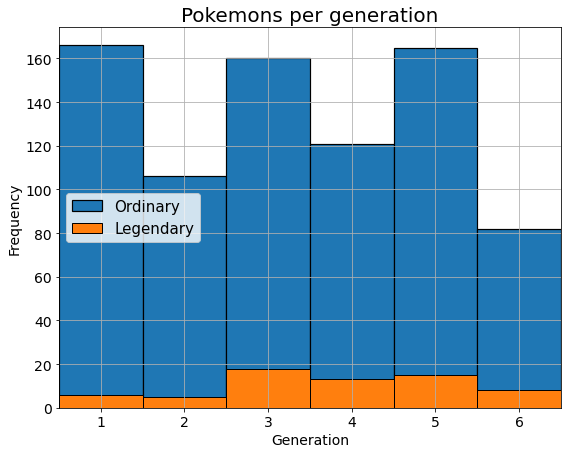

In [7]:
plt.figure(figsize=(9,7))
df.Generation.plot(kind="hist", edgecolor='black', linewidth=1.2,bins=np.arange(7)+0.5)
plt.bins=np.arange(7)+0.5
df[df["Legendary"]==True]["Generation"].plot(kind="hist", edgecolor='black',bins=np.arange(7)+0.5)
plt.xlim(0.5, 6.5)
plt.rc("axes",titlesize=20)
plt.rc("axes",labelsize=14)
plt.rc("xtick",labelsize=14)
plt.rc("ytick",labelsize=14)
plt.rc("legend",fontsize=15)
plt.grid()
plt.xlabel("Generation")
plt.title("Pokemons per generation")
plt.legend(["Ordinary", "Legendary"],loc="center left")

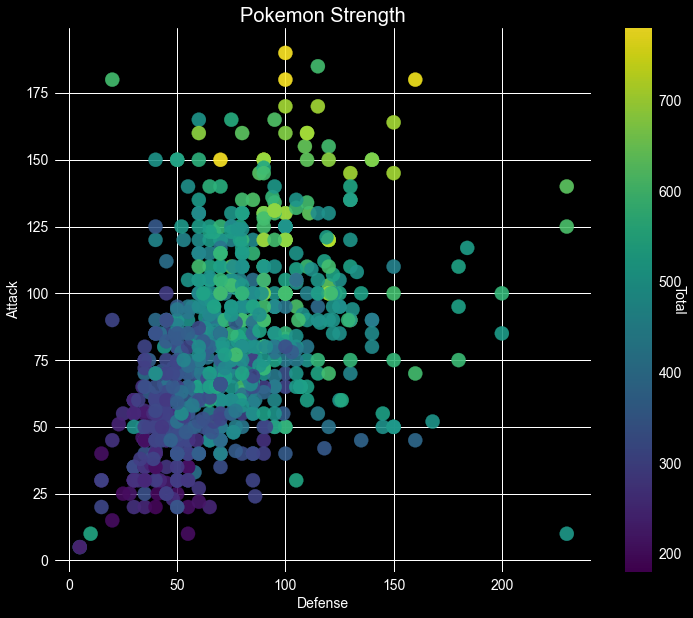

In [19]:
x = np.array(df.Defense)
y = np.array(df.Attack)
colors = np.array(df.Total)

plt.figure(figsize=(12,10))
plt.rc("axes",titlesize=20)
plt.rc("axes",labelsize=14)
plt.rc("xtick",labelsize=14)
plt.rc("ytick",labelsize=14)
plt.rc("legend",fontsize=15)
plt.xlabel("Defense")
plt.ylabel("Attack")
plt.title("Pokemon Strength")
#plt.legend(["Ordinary", "Legendary"],loc="center left")
plt.scatter(x, y,s=200, c=colors,cmap='viridis',alpha=0.9)
plt.colorbar().set_label('Total', rotation=270)
plt.style.use('dark_background')
plt.show()

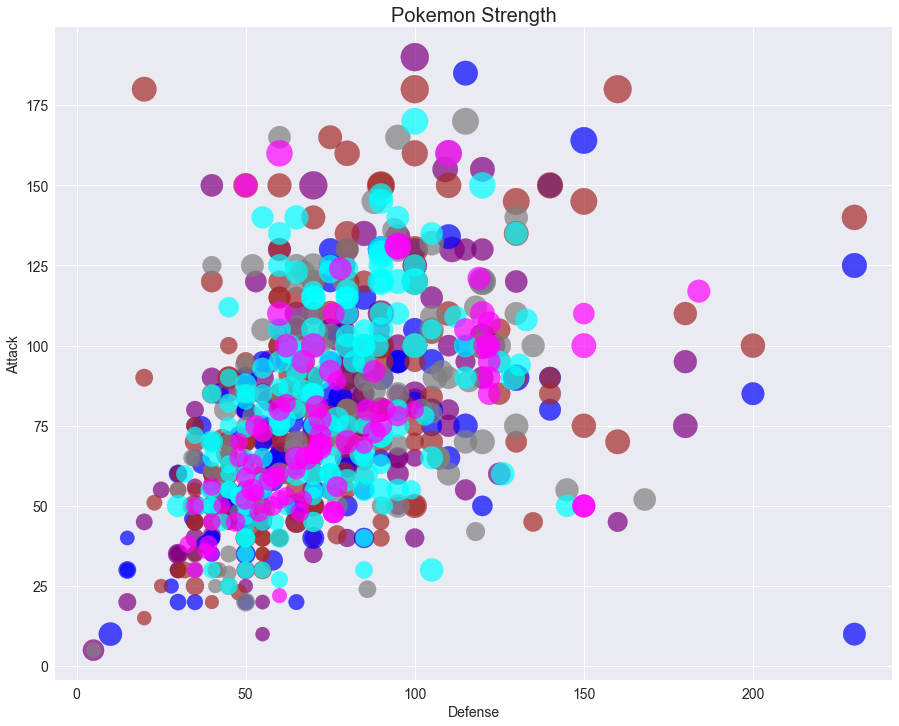

In [22]:
x = np.array(df.Defense)
y = np.array(df.Attack)

colors_dict={1:"purple",2:"blue",3:"brown",4:"gray",5:"cyan",6:"magenta"}
colors=[colors_dict[i] for i in np.array(df.Generation)]
sizes=np.array(df.Total)

plt.figure(figsize=(15,12))
plt.rc("axes",titlesize=20)
plt.rc("axes",labelsize=14)
plt.rc("xtick",labelsize=14)
plt.rc("ytick",labelsize=14)
plt.rc("legend",fontsize=15)
plt.xlabel("Defense")
plt.ylabel("Attack")
plt.title("Pokemon Strength")
#plt.legend(colors_dict.keys())
plt.scatter(x, y, s=sizes,c=colors,cmap='viridis',alpha=0.7,label=colors_dict.keys())
#plt.colorbar().set_label('HP', rotation=270)
plt.style.use('seaborn')
plt.show()

In [14]:
from matplotlib import style
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


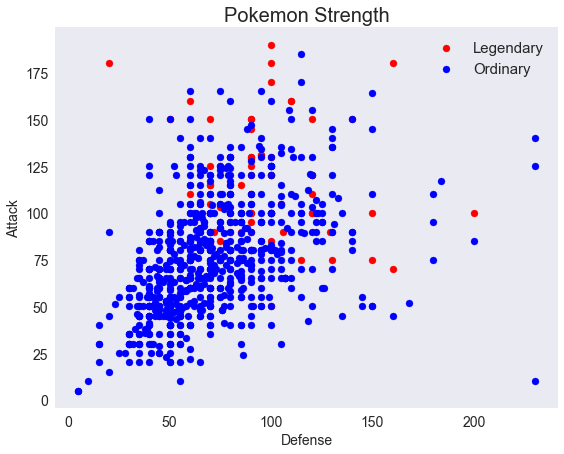

In [24]:
xL=np.array(df[df["Legendary"]==True].Defense)
yL=np.array(df[df["Legendary"]==True].Attack)
xO=np.array(df[df["Legendary"]==False].Defense)
yO=np.array(df[df["Legendary"]==False].Attack)
plt.figure(figsize=(9,7))
plt.rc("axes",titlesize=20)
plt.rc("axes",labelsize=14)
plt.rc("xtick",labelsize=14)
plt.rc("ytick",labelsize=14)
plt.rc("legend",fontsize=15)
plt.xlabel("Defense")
plt.ylabel("Attack")
plt.title("Pokemon Strength")
plt.style.use('fast')
plt.scatter(xL, yL,label="Legendary",color="red")
plt.scatter(xO,yO,label="Ordinary",color="blue")
plt.grid()
plt.legend()


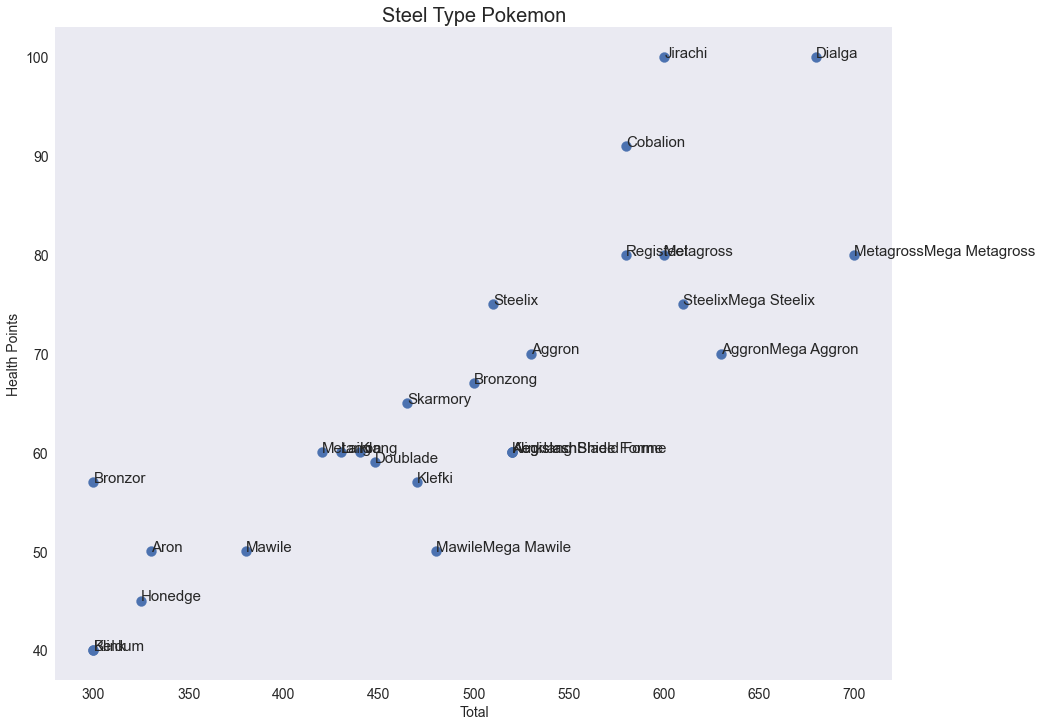

In [25]:
names=np.array(df[df["Type 1"]=="Steel"].Name)
x=np.array(df[df["Type 1"]=="Steel"].Total)
y=np.array(df[df["Type 1"]=="Steel"].HP)

plt.figure(figsize=(15,12))
plt.rc("axes",titlesize=20)
plt.rc("axes",labelsize=14)
plt.rc("xtick",labelsize=14)
plt.rc("ytick",labelsize=14)
plt.rc("legend",fontsize=14)
plt.xlabel("Total")
plt.ylabel("Health Points")
plt.title("Steel Type Pokemon")
plt.scatter(x, y,s=100)
plt.grid()
for i, label in enumerate(names):
    plt.annotate(label, (x[i], y[i]), fontsize=15)

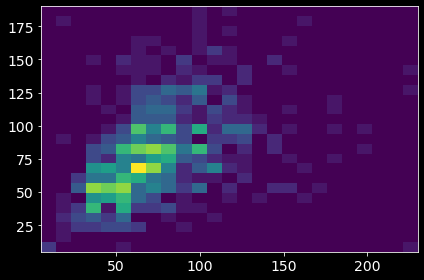

In [10]:
dist1 = np.array(df.Defense)
dist2 = np.array(df.Attack)

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(dist1, dist2,bins=25,cmap='viridis')
#plt.style.use('dark_background')